# forena님의 노트북

생성일: 2025. 9. 12. 오후 8:10:49

왼쪽 Content에서 내용을 복사해서 붙여넣으세요.

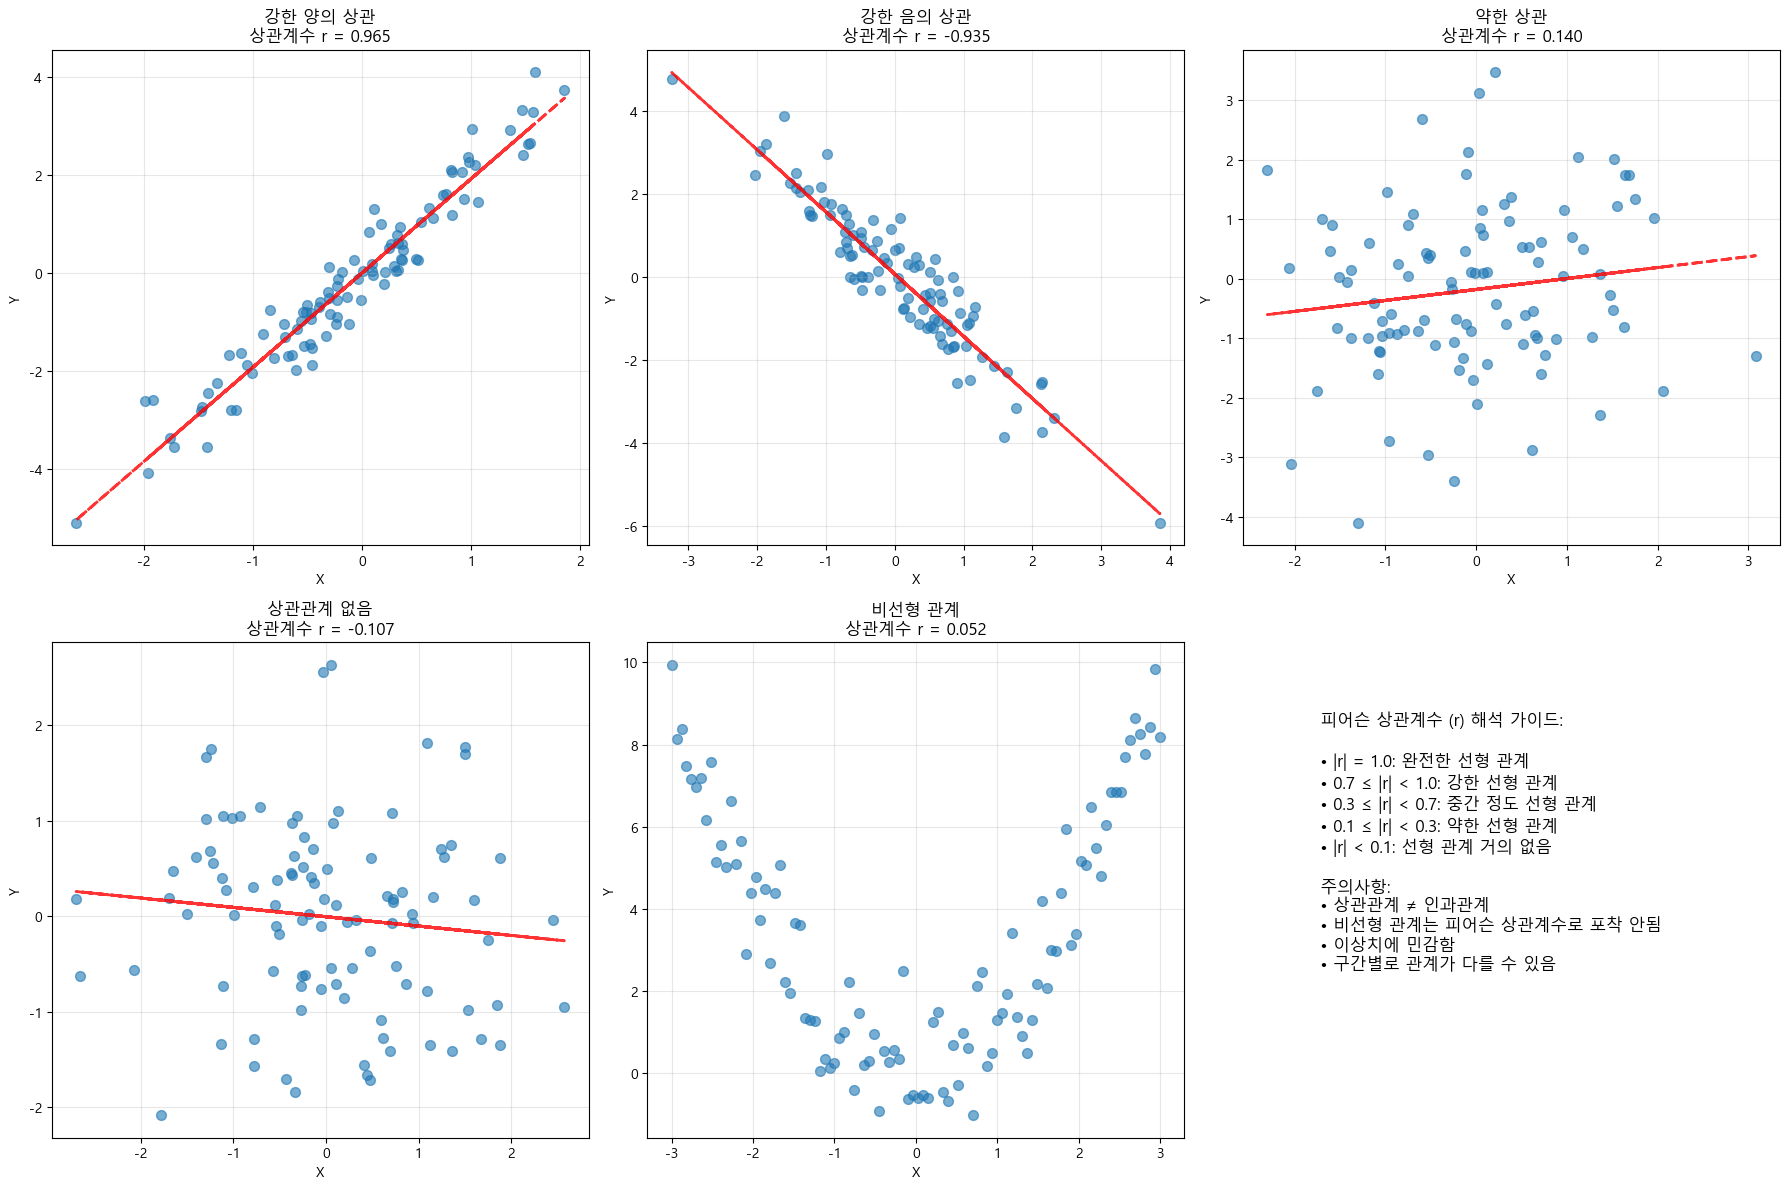

ValueError: probabilities do not sum to 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 다양한 상관관계 시각화
def demonstrate_correlations():
    np.random.seed(42)
    n = 100
    
    # 1. 강한 양의 상관관계
    x1 = np.random.normal(0, 1, n)
    y1 = 2 * x1 + np.random.normal(0, 0.5, n)
    
    # 2. 강한 음의 상관관계
    x2 = np.random.normal(0, 1, n)
    y2 = -1.5 * x2 + np.random.normal(0, 0.7, n)
    
    # 3. 약한 상관관계
    x3 = np.random.normal(0, 1, n)
    y3 = 0.3 * x3 + np.random.normal(0, 1.5, n)
    
    # 4. 상관관계 없음
    x4 = np.random.normal(0, 1, n)
    y4 = np.random.normal(0, 1, n)
    
    # 5. 비선형 관계 (상관계수는 낮지만 강한 관계)
    x5 = np.linspace(-3, 3, n)
    y5 = x5**2 + np.random.normal(0, 1, n)
    
    # 상관계수 계산
    correlations = [
        stats.pearsonr(x1, y1)[0],
        stats.pearsonr(x2, y2)[0],
        stats.pearsonr(x3, y3)[0],
        stats.pearsonr(x4, y4)[0],
        stats.pearsonr(x5, y5)[0]
    ]
    
    # 시각화
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    datasets = [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5)]
    titles = ['강한 양의 상관', '강한 음의 상관', '약한 상관', '상관관계 없음', '비선형 관계']
    
    for i, ((x, y), title, corr) in enumerate(zip(datasets, titles, correlations)):
        if i < 5:
            axes[i].scatter(x, y, alpha=0.6, s=50)
            axes[i].set_title(f'{title}\n상관계수 r = {corr:.3f}')
            axes[i].set_xlabel('X')
            axes[i].set_ylabel('Y')
            axes[i].grid(True, alpha=0.3)
            
            # 회귀직선 추가 (비선형 관계 제외)
            if i < 4:
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                axes[i].plot(x, p(x), "r--", alpha=0.8, linewidth=2)
    
    # 여섯 번째 subplot: 상관계수 해석 가이드
    axes[5].axis('off')
    interpretation_text = """
    피어슨 상관계수 (r) 해석 가이드:
    
    • |r| = 1.0: 완전한 선형 관계
    • 0.7 ≤ |r| < 1.0: 강한 선형 관계
    • 0.3 ≤ |r| < 0.7: 중간 정도 선형 관계
    • 0.1 ≤ |r| < 0.3: 약한 선형 관계
    • |r| < 0.1: 선형 관계 거의 없음
    
    주의사항:
    • 상관관계 ≠ 인과관계
    • 비선형 관계는 피어슨 상관계수로 포착 안됨
    • 이상치에 민감함
    • 구간별로 관계가 다를 수 있음
    """
    axes[5].text(0.1, 0.9, interpretation_text, transform=axes[5].transAxes, 
                fontsize=12, verticalalignment='top', fontfamily='Malgun Gothic')
    
    plt.tight_layout()
    plt.show()
    
    return correlations

correlations = demonstrate_correlations()

#### 실제 데이터를 활용한 상관관계 분석

# 타이타닉 데이터 시뮬레이션으로 상관관계 분석
np.random.seed(42)

# 타이타닉 승객 데이터 시뮬레이션
n_passengers = 891

titanic_data = pd.DataFrame({
    'age': np.random.normal(29.7, 14.5, n_passengers),
    'fare': np.random.lognormal(2.5, 1.2, n_passengers),
    'pclass': np.random.choice([1, 2, 3], n_passengers, p=[0.24, 0.21, 0.55]),
    'sibsp': np.random.choice([0, 1, 2, 3, 4, 5], n_passengers, p=[0.68, 0.23, 0.07, 0.015, 0.013, 0.002]),
    'parch': np.random.choice([0, 1, 2, 3, 4, 5, 6], n_passengers, p=[0.76, 0.13, 0.08, 0.015, 0.004, 0.002, 0.001])
})

# 현실적인 관계 설정
titanic_data['fare'] = titanic_data['fare'] * (4 - titanic_data['pclass'])  # 등급이 높을수록 비싼 요금
titanic_data['age'] = np.clip(titanic_data['age'], 0, 80)  # 나이 범위 제한

print("=== 타이타닉 데이터 상관관계 분석 ===")
print("\n기술통계:")
print(titanic_data.describe().round(2))

# 상관계수 행렬 계산
correlation_matrix = titanic_data.corr()
print(f"\n상관계수 행렬:")
print(correlation_matrix.round(3))

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('타이타닉 데이터 변수간 상관관계')
plt.tight_layout()
plt.show()

# 주요 상관관계 분석
significant_correlations = []
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j:  # 상삼각행렬만 확인
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.1:  # 절댓값 0.1 이상만
                significant_correlations.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlation': corr_value,
                    'Strength': '강함' if abs(corr_value) >= 0.7 else '중간' if abs(corr_value) >= 0.3 else '약함'
                })

significant_df = pd.DataFrame(significant_correlations)
significant_df = significant_df.sort_values('Correlation', key=abs, ascending=False)

print(f"\n주요 상관관계 (|r| > 0.1):")
print(significant_df.to_string(index=False))

### 3.3.2 인과관계 추론의 어려움

#### 상관관계 ≠ 인과관계의 고전적 사례들

print("\n=== 상관관계와 인과관계 혼동 사례 ===")

classic_examples = [
    {
        "사례": "아이스크림 판매량과 범죄율",
        "관찰된 상관관계": "양의 상관관계 (아이스크림 판매 증가 → 범죄율 증가)",
        "실제 원인": "기온 (더운 날씨에 아이스크림 판매↑, 사람들이 밖에 나와 범죄 기회↑)",
        "교훈": "숨겨진 제3의 변수(교란변수) 존재"
    },
    {
        "사례": "TV 시청시간과 비만율",
        "관찰된 상관관계": "양의 상관관계 (TV 시청↑ → 비만율↑)",
        "실제 원인": "복합적 (운동 부족, 간식 섭취, 생활 패턴 등)",
        "교훈": "다중 원인과 상호작용 효과"
    },
    {
        "사례": "교육 수준과 소득",
        "관찰된 상관관계": "양의 상관관계 (교육 수준↑ → 소득↑)",
        "실제 원인": "부분적 인과관계 + 가정환경, 개인 능력 등",
        "교훈": "인과관계가 있어도 다른 요인들의 영향 고려 필요"
    }
]

for i, example in enumerate(classic_examples, 1):
    print(f"{i}. {example['사례']}")
    print(f"   관찰: {example['관찰된 상관관계']}")
    print(f"   실제: {example['실제 원인']}")
    print(f"   교훈: {example['교훈']}")
    print()

#### 허위 상관(Spurious Correlation) 시뮬레이션

def demonstrate_spurious_correlation():
    """허위 상관 시뮬레이션"""
    np.random.seed(42)
    n = 365  # 1년 데이터
    
    # 공통 원인: 계절 (sine 파형으로 표현)
    days = np.arange(n)
    seasonal_effect = np.sin(2 * np.pi * days / 365)
    
    # 두 개의 독립적인 변수가 계절의 영향을 받음
    ice_cream_sales = 50 + 30 * seasonal_effect + np.random.normal(0, 5, n)
    drowning_incidents = 5 + 3 * seasonal_effect + np.random.normal(0, 1, n)
    
    # 허위 상관계수 계산
    spurious_corr = stats.pearsonr(ice_cream_sales, drowning_incidents)[0]
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 시계열 그래프
    axes[0, 0].plot(days, ice_cream_sales, label='아이스크림 판매량', alpha=0.7)
    axes[0, 0].plot(days, drowning_incidents * 10, label='익사 사고 × 10', alpha=0.7)  # 스케일 조정
    axes[0, 0].set_xlabel('일자 (1년)')
    axes[0, 0].set_ylabel('값')
    axes[0, 0].set_title('시간에 따른 변화 패턴')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. 산점도
    axes[0, 1].scatter(ice_cream_sales, drowning_incidents, alpha=0.6)
    axes[0, 1].set_xlabel('아이스크림 판매량')
    axes[0, 1].set_ylabel('익사 사고 건수')
    axes[0, 1].set_title(f'허위 상관관계\nr = {spurious_corr:.3f}')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 회귀직선 추가
    z = np.polyfit(ice_cream_sales, drowning_incidents, 1)
    p = np.poly1d(z)
    axes[0, 1].plot(ice_cream_sales, p(ice_cream_sales), "r--", alpha=0.8, linewidth=2)
    
    # 3. 계절 효과와 아이스크림 판매량
    axes[1, 0].scatter(seasonal_effect, ice_cream_sales, alpha=0.6, color='orange')
    axes[1, 0].set_xlabel('계절 효과')
    axes[1, 0].set_ylabel('아이스크림 판매량')
    axes[1, 0].set_title('진짜 원인: 계절 → 아이스크림')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. 계절 효과와 익사 사고
    axes[1, 1].scatter(seasonal_effect, drowning_incidents, alpha=0.6, color='red')
    axes[1, 1].set_xlabel('계절 효과')
    axes[1, 1].set_ylabel('익사 사고 건수')
    axes[1, 1].set_title('진짜 원인: 계절 → 익사 사고')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"허위 상관계수: {spurious_corr:.3f}")
    print("해석: 아이스크림 판매량과 익사 사고는 직접적 인과관계가 없음")
    print("실제 원인: 둘 다 날씨(계절)의 영향을 받는 공통 원인 존재")
    
    return spurious_corr

spurious_corr = demonstrate_spurious_correlation()

### 3.3.3 실험 설계와 인과 추론

#### 인과관계 확립을 위한 조건 (Bradford Hill 기준)

print("\n=== 인과관계 확립을 위한 주요 기준 ===")

causality_criteria = [
    {
        "기준": "시간적 선후관계",
        "설명": "원인이 결과보다 시간적으로 먼저 발생해야 함",
        "예시": "흡연이 폐암보다 먼저 시작되어야 함"
    },
    {
        "기준": "연관성의 강도",
        "설명": "원인과 결과 간의 통계적 연관성이 강해야 함",
        "예시": "흡연량이 많을수록 폐암 발생률이 크게 증가"
    },
    {
        "기준": "용량-반응 관계",
        "설명": "원인의 강도에 따라 결과도 비례적으로 변화",
        "예시": "흡연량 증가 → 폐암 위험 증가"
    },
    {
        "기준": "일관성",
        "설명": "다양한 연구에서 동일한 결과가 반복적으로 관찰",
        "예시": "여러 국가, 여러 연구에서 흡연-폐암 관계 확인"
    },
    {
        "기준": "생물학적 합리성",
        "설명": "알려진 과학적 메커니즘으로 설명 가능",
        "예시": "니코틴과 타르의 발암 메커니즘"
    }
]

for i, criterion in enumerate(causality_criteria, 1):
    print(f"{i}. {criterion['기준']}")
    print(f"   설명: {criterion['설명']}")
    print(f"   예시: {criterion['예시']}")
    print()

# 간단한 인과 추론 방법들과 요약만 포함
print("\n=== 관찰 연구에서의 인과 추론 방법 ===")
print("1. 자연 실험: 자연적으로 발생한 무작위 배정과 유사한 상황 활용")
print("2. 도구 변수: 결과에는 영향을 주지 않고 처치에만 영향을 주는 변수 활용")
print("3. 회귀 불연속: 임계점 주변에서의 불연속적 변화 활용")
print("4. 성향 점수 매칭: 관찰된 특성을 바탕으로 유사한 개체들을 매칭")
